<a href="https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/main/Script_20_1_RNN_para_An%C3%A1lisis_de_Sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ü§ñ Inteligencia Artificial Aplicada para la Econom√≠a
## Universidad de los Andes

### üë®‚Äçüè´ Profesores
- **Profesor Magistral:** [Camilo Vega Barbosa](https://www.linkedin.com/in/camilovegabarbosa/)
- **Asistente de Docencia:** [Sergio Julian Zona Moreno](https://www.linkedin.com/in/sergiozonamoreno/)

### üìö An√°lisis de Sentimiento con RNN para Tweets Financieros
Este notebook implementa Redes Neuronales Recurrentes (RNN) para an√°lisis de sentimiento en tweets financieros, utilizando el dataset **TimKoornstra/financial-tweets-sentiment**:

1. **Preprocesamiento de Texto para Tweets Financieros üßπ**
   - Limpieza y normalizaci√≥n de tweets del sector financiero
   - Tokenizaci√≥n adaptada para texto de redes sociales
   - Manejo de vocabulario especializado en finanzas y mercados

2. **Arquitecturas RNN Avanzadas üß†**
   - Simple RNN: Fundamentos de procesamiento secuencial
   - LSTM: Manejo de dependencias a largo plazo
   - GRU: Optimizaci√≥n computacional con rendimiento comparable
   - Redes Bidireccionales: Captura de contexto completo

3. **Embeddings Sem√°nticos üî§**
   - Embeddings tradicionales vs. BERT
   - Transferencia de conocimiento desde modelos preentrenados
   - Representaci√≥n contextual de t√©rminos financieros y burs√°tiles

4. **Optimizaci√≥n de Hiperpar√°metros üìä**
   - Grid Search exhaustivo
   - Evaluaci√≥n comparativa de arquitecturas
   - M√©tricas especializadas para clasificaci√≥n de sentimiento
   - Visualizaci√≥n de resultados experimentales

In [2]:
#####################################################################
# SECCI√ìN 1: INSTALACI√ìN DE LIBRER√çAS Y CONFIGURACI√ìN INICIAL
#####################################################################

# Instalaci√≥n de paquetes necesarios
!pip install transformers datasets tensorflow nltk scikit-learn matplotlib pandas -q

# Importaciones principales organizadas por categor√≠a
# --- An√°lisis de datos y visualizaci√≥n ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Procesamiento de lenguaje natural ---
import re
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertModel

# --- Modelos de Deep Learning ---
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Evaluaci√≥n de modelos ---
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# --- Otros utilitarios ---
from datasets import load_dataset
import time
import itertools

# Descarga recursos de NLTK necesarios
nltk.download('punkt', quiet=True)

# Configurar semilla aleatoria para reproducibilidad
# Esto asegura que los resultados sean consistentes en m√∫ltiples ejecuciones
np.random.seed(42)
tf.random.set_seed(42)



   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 487.4/487.4 kB 10.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 12.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 11.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 12.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 req

## Base de Datos y preprocesamiento


**Este bloque de c√≥digo** se encarga del preprocesamiento de la **base de datos TimKoornstra/financial-tweets-sentiment**, que contiene tweets clasificados seg√∫n su sentimiento sobre temas financieros: **positivo (1), negativo (2) o neutral (0)**.

La secci√≥n comienza cargando el dataset "**TimKoornstra/financial-tweets-sentiment**", que es una colecci√≥n integral de tweets enfocados en temas financieros, meticulosamente curada para an√°lisis de sentimiento en el dominio de finanzas y mercados burs√°tiles.

El c√≥digo realiza una **exploraci√≥n inicial de los datos**, verificando la distribuci√≥n de las clases en el dataset original: 17,368 sentimientos alcistas (bullish), 8,542 bajistas (bearish) y 12,181 neutrales.

A continuaci√≥n, aplica **t√©cnicas especializadas de preprocesamiento para tweets**: conversi√≥n a min√∫sculas, eliminaci√≥n de menciones (@usuario), enlaces, hashtags, caracteres especiales, y normalizaci√≥n de espacios. Tambi√©n realiza tokenizaci√≥n adaptada para el lenguaje t√≠pico de Twitter.

Los datos se dividen en **conjuntos de entrenamiento (80%) y prueba (20%)**, manteniendo la distribuci√≥n de las clases mediante estratificaci√≥n para asegurar representatividad en ambos conjuntos.

Finalmente, realiza la **tokenizaci√≥n de los textos** y carga un **modelo BERT preentrenado** para generar embeddings avanzados. Estos embeddings proporcionan **representaciones vectoriales ricas en contexto** para t√©rminos financieros espec√≠ficos, permitiendo que las redes neuronales recurrentes capturen mejor los matices del sentimiento expresado en los tweets sobre mercados financieros.


In [5]:
#####################################################################
# SECCI√ìN 2: PREPROCESAMIENTO DE LA BASE DE DATOS
#####################################################################

print("Cargando dataset de tweets financieros...")

try:
    # Cargamos el dataset TimKoornstra/financial-tweets-sentiment
    dataset = load_dataset("TimKoornstra/financial-tweets-sentiment",
                         split="train",
                         trust_remote_code=True)

    # Convertir a DataFrame
    df = pd.DataFrame(dataset)

    # Verificamos las columnas del dataset
    print(f"Columnas en el dataset: {df.columns.tolist()}")

    # Renombramos columnas para coincidir con el dataset real (nombres en min√∫sculas)
    if 'tweet' in df.columns:
        df.rename(columns={'tweet': 'text'}, inplace=True)
    if 'sentiment' in df.columns:
        df.rename(columns={'sentiment': 'label'}, inplace=True)

    # Limitamos a una muestra estratificada
    # Verificar distribuci√≥n original
    class_distribution = df['label'].value_counts()
    print("\nDistribuci√≥n original de clases:")
    print(class_distribution)

    # Muestreo estratificado asegurando m√≠nimo 2 muestras por clase
    sample_size = min(3333, class_distribution.min())  # Ajustar seg√∫n disponibilidad
    df = df.groupby('label', group_keys=False).apply(
        lambda x: x.sample(n=max(2, min(len(x), sample_size)), random_state=42)  # M√≠nimo 2 muestras por clase
    ).reset_index(drop=True)

    # Verificar nueva distribuci√≥n
    new_class_distribution = df['label'].value_counts()
    print("\nDistribuci√≥n despu√©s del muestreo:")
    print(new_class_distribution)

    # Validaci√≥n cr√≠tica: cada clase debe tener al menos 2 muestras
    if (new_class_distribution < 2).any():
        raise ValueError(f"Clase con menos de 2 muestras: {new_class_distribution}")

except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Creando datos de ejemplo como √∫ltimo recurso...")
    # Datos m√≠nimos de ejemplo mejorados
    texts = [
        "$AAPL looking bullish today, great earnings report!",
        "$TSLA down 5% after disappointing delivery numbers",
        "Markets steady as Fed maintains current policy stance",
        "Positive outlook for $GOOGL after AI conference",
        "$AMZN faces regulatory challenges in EU markets",
        "Oil prices volatile amid Middle East tensions"
    ]
    labels = [1, 2, 0, 1, 2, 0]  # Duplicamos muestras por clase
    df = pd.DataFrame({"text": texts, "label": labels})

# Exploraci√≥n b√°sica del dataset
print("\nInformaci√≥n del dataset:")
print(f"N√∫mero de ejemplos: {len(df)}")
print(f"Distribuci√≥n de clases: {df['label'].value_counts().to_dict()}")

# Validaci√≥n final para train_test_split
class_dist = df['label'].value_counts()
if (class_dist < 2).any():
    raise ValueError(f"No hay suficientes muestras para divisi√≥n estratificada. Distribuci√≥n: {class_dist}")

print("\nPrimeras filas del dataset:")
print(df.head())

# Preprocesamiento de texto especializado para tweets financieros
print("\nPreparando los datos...")

def preprocess_tweet(text):
    """
    Funci√≥n especializada para preprocesar tweets financieros
    - Elimina menciones, URLs, hashtags
    - Preserva s√≠mbolos de empresas ($AAPL, $MSFT, etc.)
    - Normaliza el texto
    """
    # Verificar tipo de dato
    if not isinstance(text, str):
        text = str(text)

    # Convertir a min√∫sculas
    text = text.lower()

    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Eliminar menciones (@usuario)
    text = re.sub(r'@\w+', '', text)

    # Preservar s√≠mbolos de acciones ($AAPL)
    stock_symbols = re.findall(r'\$[A-Za-z]+', text)

    # Eliminar caracteres especiales pero mantener letras, n√∫meros y espacios
    text = re.sub(r'[^a-zA-Z0-9\s\$]', ' ', text)  # Mantener s√≠mbolos de d√≥lar

    # Reintroducir los s√≠mbolos de acciones
    for symbol in stock_symbols:
        text = text + ' ' + symbol.lower()

    # Eliminar espacios m√∫ltiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplicar preprocesamiento
df['processed_text'] = df['text'].apply(preprocess_tweet)

# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

print(f"\nTama√±o conjunto entrenamiento: {len(X_train)}")
print(f"Tama√±o conjunto prueba: {len(X_test)}")

# Tokenizaci√≥n usando TensorFlow
print("\nTokenizando textos...")

# Par√°metros de tokenizaci√≥n
max_words = 15000  # Aumentamos el vocabulario para capturar t√©rminos financieros
max_len = 50       # Longitud m√°xima ajustada para tweets (t√≠picamente cortos)

# El tokenizador convierte palabras en n√∫meros (√≠ndices)
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')  # OOV = Out Of Vocabulary
tokenizer.fit_on_texts(X_train)  # Aprende el vocabulario del conjunto de entrenamiento

# Convertir textos a secuencias de √≠ndices
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding: hacer que todas las secuencias tengan la misma longitud
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Tama√±o real del vocabulario (limitado por max_words)
vocab_size = min(max_words, len(tokenizer.word_index)) + 1
print(f"Tama√±o del vocabulario: {vocab_size} palabras √∫nicas")

# Cargar BERT para embeddings
print("\nCargando modelo BERT para embeddings...")

# Usamos el modelo BERT base, que tiene buen rendimiento para ingl√©s general
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def get_bert_embeddings(tokenizer, bert_tokenizer, bert_model, vocab_size=15000, embedding_dim=768):
    print("Generando embeddings BERT para el vocabulario financiero...")
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    # Limitamos a las 300 palabras m√°s frecuentes para ahorrar tiempo
    # En un escenario real, se procesar√≠a todo el vocabulario
    words = []
    for word, idx in tokenizer.word_index.items():
        if idx < 300:  # Aumentamos el n√∫mero de palabras para capturar m√°s t√©rminos financieros
            words.append(word)

    # Calcular embeddings para cada palabra
    for word in words:
        idx = tokenizer.word_index[word]
        if idx >= vocab_size:
            continue

        # Tokenizar la palabra con BERT
        bert_tokens = bert_tokenizer(word, return_tensors='tf')

        # Obtener salida del modelo BERT
        outputs = bert_model(bert_tokens)

        # Usar la representaci√≥n del token
        word_embedding = outputs.last_hidden_state.numpy()[:, 1, :]
        embedding_matrix[idx] = word_embedding

    print(f"Embeddings BERT generados para {len(words)} palabras")
    return embedding_matrix

# Obtener matriz de embeddings BERT
bert_embedding_matrix = get_bert_embeddings(
    tokenizer,
    bert_tokenizer,
    bert_model,
    vocab_size=vocab_size
)

Cargando dataset de tweets financieros...


README.md:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/38091 [00:00<?, ? examples/s]

Columnas en el dataset: ['tweet', 'sentiment', 'url']

Distribuci√≥n original de clases:
label
1    17368
0    12181
2     8542
Name: count, dtype: int64

Distribuci√≥n despu√©s del muestreo:
label
0    3333
1    3333
2    3333
Name: count, dtype: int64

Informaci√≥n del dataset:
N√∫mero de ejemplos: 9999
Distribuci√≥n de clases: {0: 3333, 1: 3333, 2: 3333}

Primeras filas del dataset:
                                                text  label  \
0  Edited Transcript of MFA earnings conference c...      0   
1  German Federal President Steinmeier today awar...      0   
2  Coronavirus Threat Looms Over Fragile African ...      0   
3  $TTCM #NFT https://t.co/ncmCLAbNi9 https://t.c...      0   
4  $FLOW $APO - Apollo near deal to buy SPX Flow ...      0   

                                                 url  
0  https://huggingface.co/datasets/zeroshot/twitt...  
1  https://huggingface.co/datasets/zeroshot/twitt...  
2  https://huggingface.co/datasets/zeroshot/twitt...  
3  https://w

<ipython-input-5-1a599e9363d9>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('label', group_keys=False).apply(



Tama√±o conjunto entrenamiento: 7999
Tama√±o conjunto prueba: 2000

Tokenizando textos...
Tama√±o del vocabulario: 15001 palabras √∫nicas

Cargando modelo BERT para embeddings...


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Generando embeddings BERT para el vocabulario financiero...
Embeddings BERT generados para 299 palabras



=== MUESTRA DE DATOS LIMPIOS ===
Texto original vs. Texto procesado:


text  \
5344  $AXS #AXS \n\nü§ë %15 PROFIT ü§ë\n\nListeners Win ...   
7444  @GerberKawasaki @PeteButtigieg You‚Äôre turning ...   
1731  ÔøΩÔøΩYes! We have no bananas.üé∂ Watch the full vid...   
8719  AMZN- Bearish set up ahead of earnings. TCT me...   
4521  XX - Cheap name but ready to clear this bull f...   

                                         processed_text  label  
5344  $axs axs 15 profit listeners win dinleyenler k...      1  
7444  you re turning this tragedy into a commercial ...      2  
1731  yes we have no bananas watch the full video an...      0  
8719  amzn bearish set up ahead of earnings tct memb...      2  
4521  xx cheap name but ready to clear this bull fla...      1

<ipython-input-10-13123c634e01>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


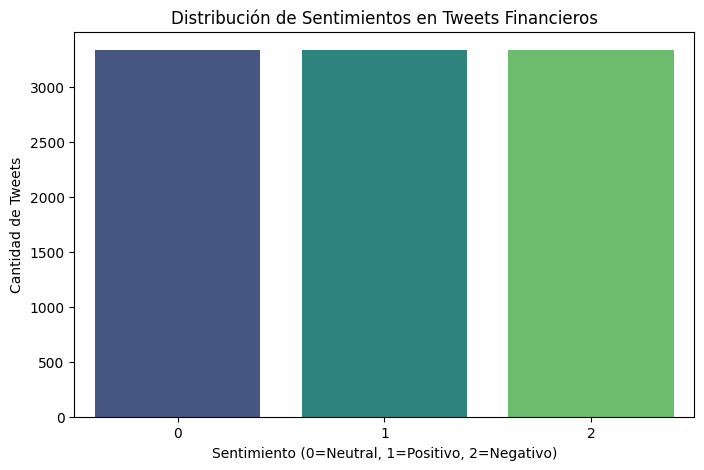


=== VISUALIZACI√ìN DE EMBEDDINGS ===
Usando embeddings BERT para visualizaci√≥n...
Aplicando reducci√≥n dimensional a 50 embeddings...


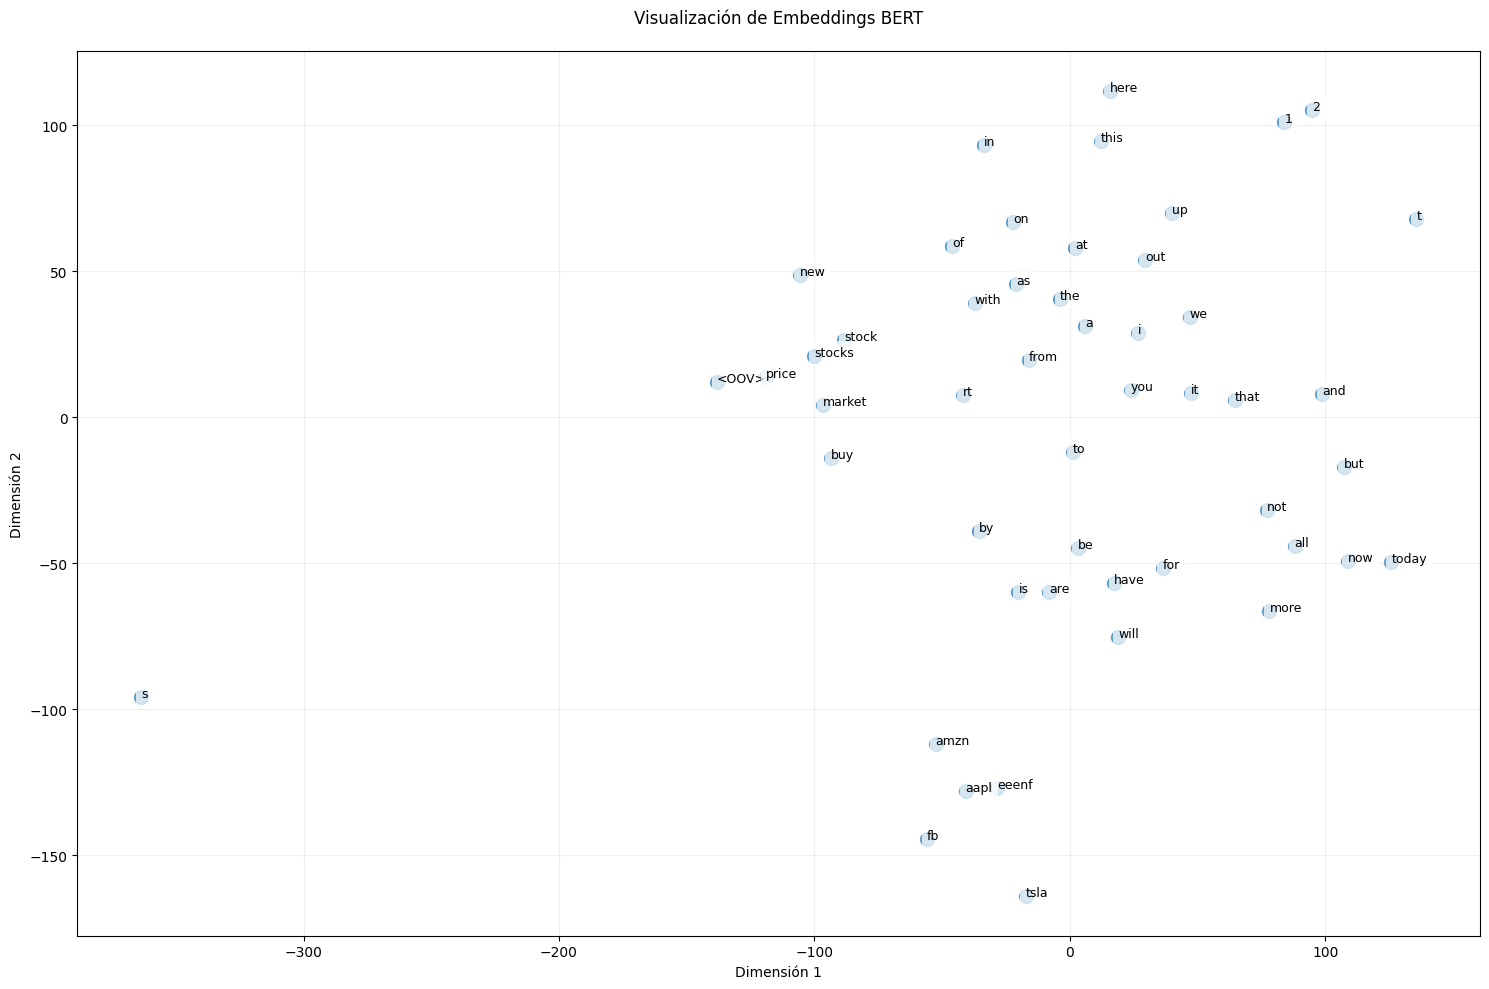


=== VISUALIZACI√ìN DE T√âRMINOS FINANCIEROS ===
Visualizando 30 t√©rminos financieros...


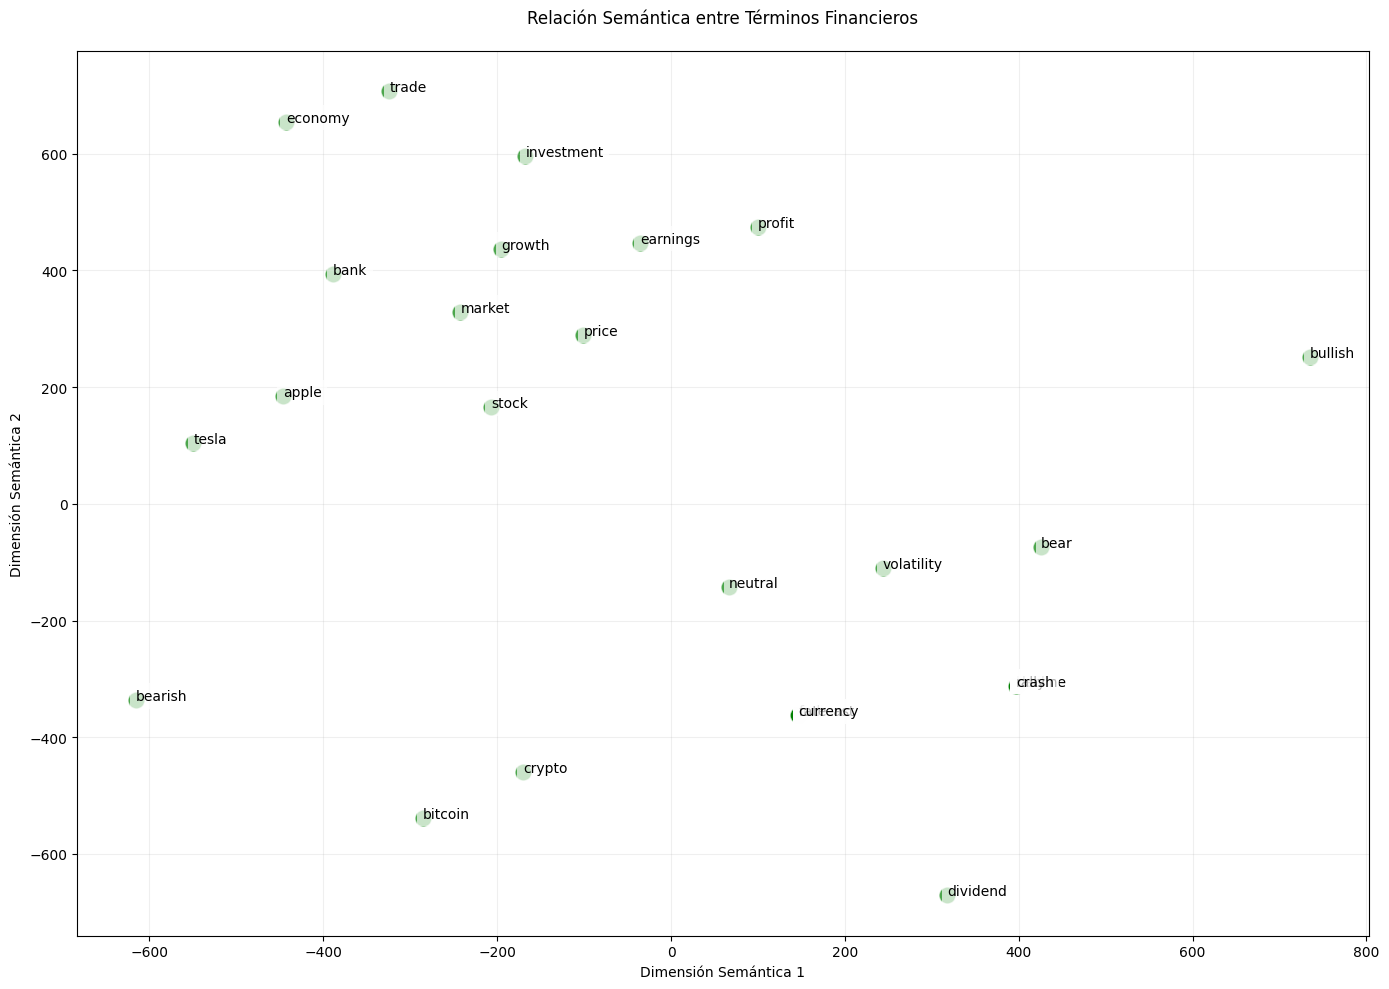

In [10]:
#####################################################################
# BLOQUE ADICIONAL: VISUALIZACI√ìN CORREGIDA DE EMBEDDINGS
#####################################################################

# 1. Visualizaci√≥n de muestra de datos limpios
print("\n=== MUESTRA DE DATOS LIMPIOS ===")
print("Texto original vs. Texto procesado:")
sample_df = df.sample(5, random_state=42)[['text', 'processed_text', 'label']]
display(sample_df)

# 2. Visualizaci√≥n de distribuci√≥n de clases
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribuci√≥n de Sentimientos en Tweets Financieros')
plt.xlabel('Sentimiento (0=Neutral, 1=Positivo, 2=Negativo)')
plt.ylabel('Cantidad de Tweets')
plt.show()

# 3. Visualizaci√≥n mejorada de embeddings con manejo de errores
print("\n=== VISUALIZACI√ìN DE EMBEDDINGS ===")

def safe_tsne(embeddings, n_components=2, perplexity=5, random_state=42):
    """Funci√≥n segura para aplicar t-SNE con par√°metros autom√°ticos"""
    from sklearn.manifold import TSNE
    n_samples = embeddings.shape[0]

    # Ajustar perplexity autom√°ticamente si es necesario
    safe_perplexity = min(perplexity, n_samples - 1) if n_samples > 1 else 1

    try:
        tsne = TSNE(n_components=n_components,
                   perplexity=safe_perplexity,
                   random_state=random_state)
        return tsne.fit_transform(embeddings)
    except Exception as e:
        print(f"Error en t-SNE: {e}. Usando PCA como alternativa...")
        from sklearn.decomposition import PCA
        pca = PCA(n_components=n_components)
        return pca.fit_transform(embeddings)

# Configuraci√≥n
num_words_to_plot = min(50, len(tokenizer.word_index))  # M√°ximo 50 palabras

# Obtener palabras m√°s frecuentes
top_words = [word for word, _ in sorted(tokenizer.word_index.items(), key=lambda x: x[1])][:num_words_to_plot]

# Verificar embeddings disponibles
use_bert = 'bert_embedding_matrix' in locals()
embedding_source = "BERT" if use_bert else "tradicionales"
print(f"Usando embeddings {embedding_source} para visualizaci√≥n...")

# Obtener embeddings
word_embeddings = {}
for word in top_words:
    try:
        if use_bert:
            if word in tokenizer.word_index and tokenizer.word_index[word] < len(bert_embedding_matrix):
                word_embeddings[word] = bert_embedding_matrix[tokenizer.word_index[word]]
        else:
            # Crear embedding dummy basado en frecuencia si no hay BERT
            word_embeddings[word] = np.array([tokenizer.word_index[word]])
    except Exception as e:
        print(f"Error obteniendo embedding para '{word}': {e}")

if not word_embeddings:
    print("No se encontraron embeddings v√°lidos. Creando datos de ejemplo...")
    word_embeddings = {f"word_{i}": np.random.rand(10) for i in range(num_words_to_plot)}

# Convertir a matriz
words = list(word_embeddings.keys())
embeddings = np.array(list(word_embeddings.values()))

# Asegurar dimensionalidad m√≠nima
if embeddings.ndim == 1:
    embeddings = embeddings.reshape(-1, 1)
if embeddings.shape[1] < 2:
    embeddings = np.hstack([embeddings, np.zeros((embeddings.shape[0], 2 - embeddings.shape[1]))])

# Reducci√≥n dimensional segura
print(f"Aplicando reducci√≥n dimensional a {len(embeddings)} embeddings...")
embeddings_2d = safe_tsne(embeddings) if len(embeddings) > 1 else embeddings[:, :2]

# Visualizaci√≥n
plt.figure(figsize=(15, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6, s=100)

# A√±adir etiquetas
for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title(f'Visualizaci√≥n de Embeddings {embedding_source}', pad=20)
plt.xlabel('Dimensi√≥n 1')
plt.ylabel('Dimensi√≥n 2')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# 4. Visualizaci√≥n especial para t√©rminos financieros (solo si hay suficientes datos)
if use_bert and len(word_embeddings) > 3:
    print("\n=== VISUALIZACI√ìN DE T√âRMINOS FINANCIEROS ===")

    finance_terms = ['bull', 'bear', 'market', 'price', 'stock', 'earnings',
                    'dollar', 'investment', 'profit', 'loss', 'apple', 'tesla',
                    'growth', 'decline', 'rally', 'crash', 'dividend', 'volatility',
                    'bullish', 'bearish', 'neutral', 'forecast', 'economy', 'trade',
                    'bank', 'fed', 'rate', 'currency', 'crypto', 'bitcoin']

    # Filtrar t√©rminos existentes
    valid_terms = [term for term in finance_terms
                  if term in word_embeddings or
                  (term in tokenizer.word_index and tokenizer.word_index[term] < len(bert_embedding_matrix))]

    if len(valid_terms) > 3:  # Necesitamos al menos 4 t√©rminos para t-SNE
        print(f"Visualizando {len(valid_terms)} t√©rminos financieros...")

        # Obtener embeddings
        term_embeddings = []
        valid_words = []
        for term in valid_terms:
            try:
                if term in word_embeddings:
                    term_embeddings.append(word_embeddings[term])
                    valid_words.append(term)
                elif term in tokenizer.word_index and tokenizer.word_index[term] < len(bert_embedding_matrix):
                    term_embeddings.append(bert_embedding_matrix[tokenizer.word_index[term]])
                    valid_words.append(term)
            except:
                continue

        term_embeddings = np.array(term_embeddings)

        # Reducci√≥n dimensional segura
        term_embeddings_2d = safe_tsne(term_embeddings) if len(term_embeddings) > 3 else term_embeddings[:, :2]

        # Visualizaci√≥n
        plt.figure(figsize=(14, 10))
        plt.scatter(term_embeddings_2d[:, 0], term_embeddings_2d[:, 1],
                   c='green', alpha=0.7, s=150, edgecolor='w')

        for i, term in enumerate(valid_words):
            plt.annotate(term, (term_embeddings_2d[i, 0], term_embeddings_2d[i, 1]),
                        fontsize=10,
                        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        plt.title('Relaci√≥n Sem√°ntica entre T√©rminos Financieros', pad=20)
        plt.xlabel('Dimensi√≥n Sem√°ntica 1')
        plt.ylabel('Dimensi√≥n Sem√°ntica 2')
        plt.grid(alpha=0.2)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Solo {len(valid_terms)} t√©rminos financieros encontrados (se necesitan al menos 4 para visualizaci√≥n)")
else:
    print("No hay suficientes datos para visualizaci√≥n especializada de t√©rminos financieros")

## Entrenamiento de diferentes RNN para an√°lisis de sentimiento


**Esta secci√≥n del c√≥digo** implementa y eval√∫a diferentes arquitecturas de **Redes Neuronales Recurrentes (RNN)** para la clasificaci√≥n de sentimiento en tweets financieros.

El proceso comienza definiendo una **funci√≥n flexible para crear modelos RNN** que permite experimentar con distintas configuraciones: **SimpleRNN b√°sicas, LSTM con memoria de largo plazo, o GRU m√°s eficientes computacionalmente**. La funci√≥n tambi√©n incorpora opciones para utilizar **capas bidireccionales** (que procesan el texto en ambas direcciones) y elegir entre **embeddings tradicionales o pre-entrenados de BERT**.

El n√∫cleo de esta secci√≥n es la implementaci√≥n de un exhaustivo **Grid Search**, una t√©cnica de optimizaci√≥n que prueba sistem√°ticamente **24 combinaciones diferentes de hiperpar√°metros** (3 tipos de RNN √ó 2 opciones de bidireccionalidad √ó 2 tama√±os de unidades √ó 2 tasas de aprendizaje), tanto con embeddings tradicionales como con BERT, resultando en **48 modelos evaluados en total**.

Para cada modelo, se registran m√©tricas clave como **accuracy, F1-score y tiempo de ejecuci√≥n**. El c√≥digo implementa **early stopping** para evitar sobreajuste, deteniendo el entrenamiento cuando el rendimiento deja de mejorar en el conjunto de validaci√≥n.

Finalmente, todos los resultados se combinan, ordenan por precisi√≥n, y se presentan los **5 mejores modelos** con sus configuraciones detalladas, proporcionando una visi√≥n clara de qu√© arquitecturas y par√°metros ofrecen mejor rendimiento para la clasificaci√≥n de sentimiento en tweets del √°mbito financiero.





In [6]:

#####################################################################
# SECCI√ìN 3: IMPLEMENTACI√ìN Y EVALUACI√ìN DE MODELOS RNN
#####################################################################

print("\nPreparando Grid Search para RNN...")

# Determinar n√∫mero de clases para la capa de salida
num_classes = len(df['label'].unique())
print(f"N√∫mero de clases a predecir: {num_classes}")

# Funci√≥n para crear diferentes modelos RNN
def create_rnn_model(model_type='lstm', bidirectional=False, units=64,
                   learning_rate=0.001, dropout_rate=0.3, use_bert=False):
    """
    Crea un modelo RNN con diferentes configuraciones

    Args:
        model_type: Tipo de celda recurrente ('simple_rnn', 'lstm', 'gru')
        bidirectional: Si usar capa bidireccional
        units: N√∫mero de unidades en la capa recurrente
        learning_rate: Tasa de aprendizaje
        dropout_rate: Tasa de dropout
        use_bert: Si usar embeddings BERT pre-entrenados
    """
    # Input layer - recibe secuencias de √≠ndices
    inp = Input(shape=(max_len,))

    # Embedding layer - convierte √≠ndices en vectores densos
    if use_bert:
        # Usar embeddings BERT (enfoque de transfer learning)
        x = Embedding(
            input_dim=vocab_size,
            output_dim=bert_embedding_matrix.shape[1],
            weights=[bert_embedding_matrix],
            input_length=max_len,
            trainable=False  # No se actualizan durante el entrenamiento
        )(inp)
    else:
        # Embedding tradicional (se aprende durante el entrenamiento)
        x = Embedding(
            input_dim=vocab_size,
            output_dim=128,  # Dimensionalidad del embedding (hiperpar√°metro)
            input_length=max_len
        )(inp)

    # Seleccionar tipo de capa recurrente
    # NOTA PARA ESTUDIANTES: Cada tipo tiene caracter√≠sticas diferentes:
    # - SimpleRNN: La m√°s b√°sica, problemas con dependencias largas
    # - LSTM: Mejor memoria de largo plazo, m√°s par√°metros
    # - GRU: Similar a LSTM pero m√°s eficiente computacionalmente
    if model_type == 'simple_rnn':
        rnn_layer = SimpleRNN(units, return_sequences=True)
    elif model_type == 'lstm':
        rnn_layer = LSTM(units, return_sequences=True)
    else:  # gru
        rnn_layer = GRU(units, return_sequences=True)

    # Aplicar capa recurrente
    if bidirectional:
        x = Bidirectional(rnn_layer)(x)
    else:
        x = rnn_layer(x)

    # Global Pooling - colapsa la secuencia a un vector fijo
    x = GlobalMaxPooling1D()(x)

    # Dropout - t√©cnica de regularizaci√≥n para evitar sobreajuste
    x = Dropout(dropout_rate)(x)

    # Capa de salida - softmax para clasificaci√≥n multiclase
    out = Dense(num_classes, activation='softmax')(x)

    # Compilar modelo
    model = Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',  # Para etiquetas enteras (no one-hot)
        metrics=['accuracy']
    )

    return model

# Definir par√°metros para el grid search
param_grid = {
    'model_type': ['simple_rnn', 'lstm', 'gru'],           # Tipo de RNN
    'bidirectional': [False, True],                         # Usar o no capa bidireccional
    'units': [32, 64],                                      # N√∫mero de unidades (neuronas)
    'learning_rate': [0.001, 0.0001],                       # Tasa de aprendizaje
    'batch_size': [32],                                     # Tama√±o del lote
    'epochs': [5]                                           # √âpocas de entrenamiento
}

# Funci√≥n para realizar grid search
def run_grid_search(param_grid, X_train, y_train, X_val, y_val, use_bert=False):
    """
    Realiza grid search sobre los hiperpar√°metros
    """
    # Generar todas las combinaciones posibles de hiperpar√°metros
    keys = param_grid.keys()
    combinations = list(itertools.product(*param_grid.values()))
    param_combinations = [dict(zip(keys, combo)) for combo in combinations]

    # Lista para almacenar resultados
    results = []

    print(f"Probando {len(param_combinations)} combinaciones de modelos...")

    # Probar cada combinaci√≥n
    for i, params in enumerate(param_combinations):
        start_time = time.time()

        # Extraer par√°metros
        model_type = params['model_type']
        bidirectional = params['bidirectional']
        units = params['units']
        learning_rate = params['learning_rate']
        batch_size = params['batch_size']
        epochs = params['epochs']

        # Crear nombre descriptivo para el modelo
        model_name = f"{model_type.upper()}"
        if bidirectional:
            model_name = f"Bi{model_name}"
        model_name += f"_u{units}_lr{learning_rate}"
        if use_bert:
            model_name += "_BERT"

        print(f"\n[{i+1}/{len(param_combinations)}] Entrenando {model_name}...")

        # Crear modelo con los par√°metros actuales
        model = create_rnn_model(
            model_type=model_type,
            bidirectional=bidirectional,
            units=units,
            learning_rate=learning_rate,
            dropout_rate=0.3,  # Fijo para simplificar
            use_bert=use_bert
        )

        # Early stopping - detiene el entrenamiento cuando deja de mejorar
        early_stopping = EarlyStopping(
            monitor='val_accuracy',
            patience=2,  # N√∫mero de √©pocas sin mejora antes de detenerse
            restore_best_weights=True  # Restaura los mejores pesos encontrados
        )

        # Entrenar modelo
        history = model.fit(
            X_train,
            y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

        # Evaluar modelo en conjunto de validaci√≥n
        y_pred_probs = model.predict(X_val)
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Calcular m√©tricas de rendimiento
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Tiempo de ejecuci√≥n
        execution_time = time.time() - start_time

        # Guardar resultados
        result = {
            'model_name': model_name,
            'model_type': model_type,
            'bidirectional': bidirectional,
            'units': units,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'accuracy': accuracy,
            'f1_score': f1,
            'execution_time': execution_time,
            'use_bert': use_bert
        }

        results.append(result)

        print(f"Resultado: Acc={accuracy:.4f}, F1={f1:.4f}, Tiempo={execution_time:.1f}s")

    # Ordenar resultados por precisi√≥n (de mayor a menor)
    results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)

    return results_sorted

# Ejecutar grid search con embeddings tradicionales
print("\nEjecutando grid search con embeddings tradicionales...")
results_traditional = run_grid_search(
    param_grid,
    X_train_pad,
    y_train,
    X_test_pad,
    y_test,
    use_bert=False
)

# Ejecutar grid search con BERT embeddings
print("\nEjecutando grid search con embeddings BERT...")
results_bert = run_grid_search(
    param_grid,
    X_train_pad,
    y_train,
    X_test_pad,
    y_test,
    use_bert=True
)

# Combinar y ordenar todos los resultados
all_results = results_traditional + results_bert
all_results_sorted = sorted(all_results, key=lambda x: x['accuracy'], reverse=True)

# Mostrar los mejores resultados
print("\n=== RESULTADOS DEL GRID SEARCH ===")
print("\nTop modelos por precisi√≥n:")
for i, result in enumerate(all_results_sorted[:5]):
    print(f"\n{i+1}. {result['model_name']}:")
    print(f"   Accuracy: {result['accuracy']:.4f}")
    print(f"   F1-Score: {result['f1_score']:.4f}")
    print(f"   Tiempo: {result['execution_time']:.1f}s")
    print(f"   Usa BERT: {result['use_bert']}")
    print(f"   Tipo: {result['model_type'].upper()}, Bidireccional: {result['bidirectional']}")

# Crear DataFrame para visualizaci√≥n
results_df = pd.DataFrame(all_results_sorted)




Preparando Grid Search para RNN...
N√∫mero de clases a predecir: 3

Ejecutando grid search con embeddings tradicionales...
Probando 24 combinaciones de modelos...

[1/24] Entrenando SIMPLE_RNN_u32_lr0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 16ms/step - accuracy: 0.3945 - loss: 1.0856 - val_accuracy: 0.5870 - val_loss: 0.9041
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 7ms/step - accuracy: 0.6429 - loss: 0.8260 - val_accuracy: 0.6550 - val_loss: 0.8027
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.8115 - loss: 0.5204 - val_accuracy: 0.6655 - val_loss: 0.8257
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - accuracy: 0.8836 - loss: 0.3268 - val_accuracy: 0.6315 - val_loss: 1.0180
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - accuracy: 0.9313 - loss: 0.2145 - val_accuracy: 0.6450 - val_loss: 1.0643
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 15ms/step
Resultado: Acc=0.6655, F1=0.6649, Tiempo=23.5s

[2/24] Entrenando SIMPLE_RNN_u32_lr0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 22ms/step - accuracy: 0.3476 - loss: 1.1237 - val_accuracy: 0.4080 - val_loss: 1.0776
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.4306 - loss: 1.0607 - val_accuracy: 0.5115 - val_loss: 1.0203
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.5377 - loss: 0.9759 - val_accuracy: 0.5285 - val_loss: 0.9885
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.5886 - loss: 0.9055 - val_accuracy: 0.5465 - val_loss: 0.9745
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 8ms/step - accuracy: 0.6428 - loss: 0.8399 - val_accuracy: 0.5640 - val_loss: 0.9564
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step
Resultado: Acc=0.5640, F1=0.5553, Tiempo=24.2s

[3/24] Entrenando SIMPLE_RNN_u64_lr0.001...
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 20ms/step - accuracy: 0.3863 - loss: 1.0889 - val_accuracy: 0.5535 - val_loss: 0.9298
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6341 - loss: 0.8293 - val_accuracy: 0.6435 - val_loss: 0.8467
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - accuracy: 0.8165 - loss: 0.4903 - val_accuracy: 0.6385 - val_loss: 0.9278
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.9174 - loss: 0.2568 - val_accuracy: 0.6585 - val_loss: 0.9839
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.9470 - loss: 0.1634 - val_accuracy: 0.6465 - val_loss: 1.0985
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step
Resultado: Acc=0.6585, F1=0.6586, Tiempo=17.1s

[4/24] Entrenando SIMPLE_RNN_u64_lr0.0001...
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 14ms/step - accuracy: 0.3246 - loss: 1.1225 - val_accuracy: 0.4120 - val_loss: 1.0867
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4342 - loss: 1.0652 - val_accuracy: 0.5050 - val_loss: 1.0322
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - accuracy: 0.5478 - loss: 0.9748 - val_accuracy: 0.5655 - val_loss: 0.9602
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.6666 - loss: 0.8449 - val_accuracy: 0.5760 - val_loss: 0.9396
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 6ms/step - accuracy: 0.7565 - loss: 0.6939 - val_accuracy: 0.5885 - val_loss: 0.9301
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step
Resultado: Acc=0.5885, F1=0.5877, Tiempo=15.5s

[5/24] Entrenando BiSIMPLE_RNN_u32_lr0.001...
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 23ms/step - accuracy: 0.3943 - loss: 1.0799 - val_accuracy: 0.6150 - val_loss: 0.8757
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 10ms/step - accuracy: 0.6826 - loss: 0.7524 - val_accuracy: 0.6750 - val_loss: 0.7782
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.8598 - loss: 0.4029 - val_accuracy: 0.6730 - val_loss: 0.7928
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.9317 - loss: 0.2129 - val_accuracy: 0.6540 - val_loss: 0.9626
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step
Resultado: Acc=0.6750, F1=0.6752, Tiempo=26.5s

[6/24] Entrenando BiSIMPLE_RNN_u32_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 23ms/step - accuracy: 0.3373 - loss: 1.1167 - val_accuracy: 0.3770 - val_loss: 1.0912
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 10ms/step - accuracy: 0.4214 - loss: 1.0723 - val_accuracy: 0.4135 - val_loss: 1.0811
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5110 - loss: 1.0324 - val_accuracy: 0.4590 - val_loss: 1.0686
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5909 - loss: 0.9896 - val_accuracy: 0.4865 - val_loss: 1.0481
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.6675 - loss: 0.9310 - val_accuracy: 0.5280 - val_loss: 1.0162
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 12ms/step
Resultado: Acc=0.5280, F1=0.5280, Tiempo=26.4s

[7/24] Entrenando BiSIMPLE_RNN_u64_lr0.001

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 22ms/step - accuracy: 0.3778 - loss: 1.1006 - val_accuracy: 0.5280 - val_loss: 0.9793
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5753 - loss: 0.8977 - val_accuracy: 0.6620 - val_loss: 0.7760
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.7975 - loss: 0.5267 - val_accuracy: 0.6715 - val_loss: 0.7847
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.9081 - loss: 0.2850 - val_accuracy: 0.6730 - val_loss: 0.8388
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.9593 - loss: 0.1487 - val_accuracy: 0.6735 - val_loss: 0.9477
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 21ms/step
Resultado: Acc=0.6735, F1=0.6725, Tiempo=24.7s

[8/24] Entrenando BiSIMPLE_RNN_u64_lr0.00

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 21ms/step - accuracy: 0.3430 - loss: 1.1095 - val_accuracy: 0.3855 - val_loss: 1.0866
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.4460 - loss: 1.0564 - val_accuracy: 0.4925 - val_loss: 1.0008
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.5420 - loss: 0.9546 - val_accuracy: 0.5000 - val_loss: 0.9928
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5932 - loss: 0.8835 - val_accuracy: 0.5140 - val_loss: 0.9701
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.6407 - loss: 0.8223 - val_accuracy: 0.5345 - val_loss: 0.9337
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step
Resultado: Acc=0.5345, F1=0.4796, Tiempo=21.1s

[9/24] Entrenando LSTM_u32_lr0.001...
Epoc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 12ms/step - accuracy: 0.4506 - loss: 1.0456 - val_accuracy: 0.6580 - val_loss: 0.8003
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.7303 - loss: 0.6696 - val_accuracy: 0.6670 - val_loss: 0.8589
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.8677 - loss: 0.3852 - val_accuracy: 0.6510 - val_loss: 1.0017
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.9255 - loss: 0.2310 - val_accuracy: 0.6605 - val_loss: 1.1085
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.6670, F1=0.6661, Tiempo=14.3s

[10/24] Entrenando LSTM_u32_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 11ms/step - accuracy: 0.3664 - loss: 1.0973 - val_accuracy: 0.4665 - val_loss: 1.0910
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4994 - loss: 1.0857 - val_accuracy: 0.5875 - val_loss: 1.0693
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5745 - loss: 1.0268 - val_accuracy: 0.5120 - val_loss: 0.9834
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.5848 - loss: 0.8716 - val_accuracy: 0.5200 - val_loss: 0.9799
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5875, F1=0.5880, Tiempo=11.3s

[11/24] Entrenando LSTM_u64_lr0.001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 11ms/step - accuracy: 0.4376 - loss: 1.0519 - val_accuracy: 0.6645 - val_loss: 0.8024
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.7286 - loss: 0.6759 - val_accuracy: 0.6725 - val_loss: 0.8358
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.8652 - loss: 0.3764 - val_accuracy: 0.6710 - val_loss: 0.8952
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.9287 - loss: 0.2202 - val_accuracy: 0.6600 - val_loss: 1.0896
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.6725, F1=0.6711, Tiempo=11.0s

[12/24] Entrenando LSTM_u64_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.3627 - loss: 1.0970 - val_accuracy: 0.5140 - val_loss: 1.0905
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5034 - loss: 1.0831 - val_accuracy: 0.5215 - val_loss: 1.0228
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.5243 - loss: 0.9750 - val_accuracy: 0.5140 - val_loss: 0.9712
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6456 - loss: 0.7780 - val_accuracy: 0.5685 - val_loss: 0.9566
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.7428 - loss: 0.6344 - val_accuracy: 0.5790 - val_loss: 1.0386
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5790, F1=0.5799, Tiempo=12.2s

[13/24] Entrenando BiLSTM_u32_lr0.001...
Epoch 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 15ms/step - accuracy: 0.4449 - loss: 1.0447 - val_accuracy: 0.6665 - val_loss: 0.7735
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.7303 - loss: 0.6491 - val_accuracy: 0.6805 - val_loss: 0.8274
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.8741 - loss: 0.3581 - val_accuracy: 0.6685 - val_loss: 1.0226
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.9357 - loss: 0.1887 - val_accuracy: 0.6670 - val_loss: 1.1914
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.6805, F1=0.6807, Tiempo=14.4s

[14/24] Entrenando BiLSTM_u32_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.3532 - loss: 1.0974 - val_accuracy: 0.4420 - val_loss: 1.0907
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5019 - loss: 1.0838 - val_accuracy: 0.5705 - val_loss: 1.0650
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.6061 - loss: 1.0296 - val_accuracy: 0.5450 - val_loss: 0.9291
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.6509 - loss: 0.8141 - val_accuracy: 0.6265 - val_loss: 0.9075
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.7515 - loss: 0.6653 - val_accuracy: 0.6270 - val_loss: 0.9312
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step
Resultado: Acc=0.6270, F1=0.6284, Tiempo=18.9s

[15/24] Entrenando BiLSTM_u64_lr0.001...
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.4392 - loss: 1.0414 - val_accuracy: 0.6690 - val_loss: 0.7639
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.7461 - loss: 0.6245 - val_accuracy: 0.6595 - val_loss: 0.8813
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.8766 - loss: 0.3412 - val_accuracy: 0.6550 - val_loss: 1.0644
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.6690, F1=0.6687, Tiempo=11.3s

[16/24] Entrenando BiLSTM_u64_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 12ms/step - accuracy: 0.3475 - loss: 1.0975 - val_accuracy: 0.4310 - val_loss: 1.0904
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.4978 - loss: 1.0823 - val_accuracy: 0.5175 - val_loss: 1.0139
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5492 - loss: 0.9407 - val_accuracy: 0.4880 - val_loss: 1.0093
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.6689 - loss: 0.7318 - val_accuracy: 0.6145 - val_loss: 0.9522
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.7802 - loss: 0.5716 - val_accuracy: 0.6260 - val_loss: 0.9811
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step
Resultado: Acc=0.6260, F1=0.6258, Tiempo=19.2s

[17/24] Entrenando GRU_u32_lr0.001...
Epoch

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.4370 - loss: 1.0533 - val_accuracy: 0.6585 - val_loss: 0.7851
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.7133 - loss: 0.6923 - val_accuracy: 0.6380 - val_loss: 0.9497
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.8589 - loss: 0.3879 - val_accuracy: 0.6485 - val_loss: 1.0477
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.6585, F1=0.6587, Tiempo=9.9s

[18/24] Entrenando GRU_u32_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 11ms/step - accuracy: 0.3482 - loss: 1.0973 - val_accuracy: 0.4960 - val_loss: 1.0868
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 7ms/step - accuracy: 0.5205 - loss: 1.0788 - val_accuracy: 0.5935 - val_loss: 1.0642
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.6232 - loss: 1.0465 - val_accuracy: 0.6225 - val_loss: 1.0234
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6778 - loss: 0.9882 - val_accuracy: 0.6350 - val_loss: 0.9098
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.6600 - loss: 0.8540 - val_accuracy: 0.6480 - val_loss: 0.8824
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step
Resultado: Acc=0.6480, F1=0.6472, Tiempo=15.7s

[19/24] Entrenando GRU_u64_lr0.001...
Epoch 1/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.4544 - loss: 1.0451 - val_accuracy: 0.6660 - val_loss: 0.7778
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.7384 - loss: 0.6484 - val_accuracy: 0.6620 - val_loss: 0.8834
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.8721 - loss: 0.3526 - val_accuracy: 0.6565 - val_loss: 1.0208
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.6660, F1=0.6661, Tiempo=8.0s

[20/24] Entrenando GRU_u64_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 11ms/step - accuracy: 0.3642 - loss: 1.0977 - val_accuracy: 0.4935 - val_loss: 1.0886
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5267 - loss: 1.0796 - val_accuracy: 0.5695 - val_loss: 1.0605
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6123 - loss: 1.0267 - val_accuracy: 0.5025 - val_loss: 0.9756
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.6013 - loss: 0.8402 - val_accuracy: 0.5625 - val_loss: 0.9585
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5695, F1=0.5641, Tiempo=11.9s

[21/24] Entrenando BiGRU_u32_lr0.001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 16ms/step - accuracy: 0.4589 - loss: 1.0471 - val_accuracy: 0.6620 - val_loss: 0.7703
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.7261 - loss: 0.6639 - val_accuracy: 0.6840 - val_loss: 0.8321
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.8689 - loss: 0.3543 - val_accuracy: 0.6670 - val_loss: 1.0405
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.9412 - loss: 0.1794 - val_accuracy: 0.6600 - val_loss: 1.2142
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step
Resultado: Acc=0.6840, F1=0.6834, Tiempo=15.9s

[22/24] Entrenando BiGRU_u32_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.3556 - loss: 1.0971 - val_accuracy: 0.5170 - val_loss: 1.0873
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.4964 - loss: 1.0811 - val_accuracy: 0.5720 - val_loss: 1.0694
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.6234 - loss: 1.0533 - val_accuracy: 0.6180 - val_loss: 1.0340
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.6873 - loss: 1.0044 - val_accuracy: 0.6450 - val_loss: 0.9634
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.7215 - loss: 0.9002 - val_accuracy: 0.6330 - val_loss: 0.8501
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step
Resultado: Acc=0.6450, F1=0.6445, Tiempo=16.0s

[23/24] Entrenando BiGRU_u64_lr0.001...
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.4563 - loss: 1.0341 - val_accuracy: 0.6835 - val_loss: 0.7504
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.7353 - loss: 0.6342 - val_accuracy: 0.6795 - val_loss: 0.8359
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.8829 - loss: 0.3261 - val_accuracy: 0.6595 - val_loss: 1.1182
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.6835, F1=0.6833, Tiempo=11.0s

[24/24] Entrenando BiGRU_u64_lr0.0001...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.3553 - loss: 1.0974 - val_accuracy: 0.5165 - val_loss: 1.0873
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5463 - loss: 1.0789 - val_accuracy: 0.5855 - val_loss: 1.0594
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.6343 - loss: 1.0310 - val_accuracy: 0.5945 - val_loss: 0.9715
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.6531 - loss: 0.8610 - val_accuracy: 0.5710 - val_loss: 0.9568
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.7373 - loss: 0.6602 - val_accuracy: 0.6730 - val_loss: 0.8909
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step
Resultado: Acc=0.6730, F1=0.6717, Tiempo=18.1s

Ejecutando grid search con embeddings BERT.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 18ms/step - accuracy: 0.3993 - loss: 1.1259 - val_accuracy: 0.4960 - val_loss: 1.0104
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4865 - loss: 1.0123 - val_accuracy: 0.5110 - val_loss: 0.9855
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5296 - loss: 0.9705 - val_accuracy: 0.5420 - val_loss: 0.9425
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.5452 - loss: 0.9425 - val_accuracy: 0.5450 - val_loss: 0.9373
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5607 - loss: 0.9259 - val_accuracy: 0.5650 - val_loss: 0.9277
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step
Resultado: Acc=0.5650, F1=0.5583, Tiempo=18.5s

[2/24] Entrenando SIMPLE_RNN_u32_lr0.0001_BERT.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 14ms/step - accuracy: 0.3431 - loss: 1.2314 - val_accuracy: 0.3715 - val_loss: 1.0878
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.3913 - loss: 1.1048 - val_accuracy: 0.4005 - val_loss: 1.0679
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4358 - loss: 1.0593 - val_accuracy: 0.4270 - val_loss: 1.0505
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4736 - loss: 1.0244 - val_accuracy: 0.4575 - val_loss: 1.0360
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4733 - loss: 1.0249 - val_accuracy: 0.4885 - val_loss: 1.0144
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step
Resultado: Acc=0.4885, F1=0.4832, Tiempo=15.8s

[3/24] Entrenando SIMPLE_RNN_u64_lr0.001_BERT..

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 19ms/step - accuracy: 0.3987 - loss: 1.1587 - val_accuracy: 0.5350 - val_loss: 0.9654
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 7ms/step - accuracy: 0.5017 - loss: 0.9967 - val_accuracy: 0.5600 - val_loss: 0.9391
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.5469 - loss: 0.9438 - val_accuracy: 0.5650 - val_loss: 0.9257
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5630 - loss: 0.9274 - val_accuracy: 0.5660 - val_loss: 0.9257
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5841 - loss: 0.9050 - val_accuracy: 0.5335 - val_loss: 0.9366
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step
Resultado: Acc=0.5660, F1=0.5607, Tiempo=22.6s

[4/24] Entrenando SIMPLE_RNN_u64_lr0.0001_BERT.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 20ms/step - accuracy: 0.3546 - loss: 1.2129 - val_accuracy: 0.4595 - val_loss: 1.0322
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 8ms/step - accuracy: 0.4259 - loss: 1.0951 - val_accuracy: 0.4895 - val_loss: 1.0025
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4683 - loss: 1.0330 - val_accuracy: 0.5020 - val_loss: 0.9849
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.4910 - loss: 1.0070 - val_accuracy: 0.5200 - val_loss: 0.9706
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5159 - loss: 0.9775 - val_accuracy: 0.5360 - val_loss: 0.9594
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step
Resultado: Acc=0.5360, F1=0.5321, Tiempo=22.2s

[5/24] Entrenando BiSIMPLE_RNN_u32_lr0.001_BERT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 25ms/step - accuracy: 0.3985 - loss: 1.1236 - val_accuracy: 0.4900 - val_loss: 0.9983
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.4912 - loss: 1.0035 - val_accuracy: 0.5345 - val_loss: 0.9672
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.5269 - loss: 0.9637 - val_accuracy: 0.5525 - val_loss: 0.9410
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.5642 - loss: 0.9270 - val_accuracy: 0.5555 - val_loss: 0.9263
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.5725 - loss: 0.9121 - val_accuracy: 0.5525 - val_loss: 0.9324
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step
Resultado: Acc=0.5555, F1=0.5466, Tiempo=35.5s

[6/24] Entrenando BiSIMPLE_RNN_u32_lr0.00

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 25ms/step - accuracy: 0.3531 - loss: 1.3011 - val_accuracy: 0.3935 - val_loss: 1.0724
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.4228 - loss: 1.0996 - val_accuracy: 0.4600 - val_loss: 1.0300
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.4589 - loss: 1.0523 - val_accuracy: 0.5020 - val_loss: 0.9977
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.4868 - loss: 1.0143 - val_accuracy: 0.5220 - val_loss: 0.9814
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.5074 - loss: 0.9851 - val_accuracy: 0.5315 - val_loss: 0.9687
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step
Resultado: Acc=0.5315, F1=0.5302, Tiempo=30.7s

[7/24] Entrenando BiSIMPLE_RNN_u64_lr0.00

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 23ms/step - accuracy: 0.4002 - loss: 1.1682 - val_accuracy: 0.5080 - val_loss: 0.9804
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 12ms/step - accuracy: 0.5123 - loss: 0.9967 - val_accuracy: 0.5420 - val_loss: 0.9479
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.5524 - loss: 0.9294 - val_accuracy: 0.5665 - val_loss: 0.9200
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.5754 - loss: 0.8983 - val_accuracy: 0.5610 - val_loss: 0.9154
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.5856 - loss: 0.8792 - val_accuracy: 0.5795 - val_loss: 0.8966
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step
Resultado: Acc=0.5795, F1=0.5796, Tiempo=31.3s

[8/24] Entrenando BiSIMPLE_RNN_u

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 22ms/step - accuracy: 0.3599 - loss: 1.2326 - val_accuracy: 0.4175 - val_loss: 1.0504
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 13ms/step - accuracy: 0.4473 - loss: 1.0798 - val_accuracy: 0.4685 - val_loss: 1.0109
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.4968 - loss: 1.0124 - val_accuracy: 0.4890 - val_loss: 0.9882
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.5290 - loss: 0.9620 - val_accuracy: 0.5050 - val_loss: 0.9704
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.5508 - loss: 0.9325 - val_accuracy: 0.5395 - val_loss: 0.9497
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step
Resultado: Acc=0.5395, F1=0.5348, Tiempo=30.1s

[9/24] Entrenando LSTM_u32_lr0.001_BERT..

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.4355 - loss: 1.0470 - val_accuracy: 0.4795 - val_loss: 0.9929
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5287 - loss: 0.9488 - val_accuracy: 0.5565 - val_loss: 0.9266
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5701 - loss: 0.9132 - val_accuracy: 0.5625 - val_loss: 0.9095
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.5881 - loss: 0.8837 - val_accuracy: 0.5805 - val_loss: 0.8853
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 7ms/step - accuracy: 0.5975 - loss: 0.8618 - val_accuracy: 0.5810 - val_loss: 0.8844
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5810, F1=0.5790, Tiempo=15.4s

[10/24] Entrenando LSTM_u32_lr0.0001_BERT...
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.3719 - loss: 1.0959 - val_accuracy: 0.4815 - val_loss: 1.0470
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.4696 - loss: 1.0428 - val_accuracy: 0.4915 - val_loss: 1.0165
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4950 - loss: 1.0176 - val_accuracy: 0.5160 - val_loss: 0.9972
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5206 - loss: 0.9872 - val_accuracy: 0.5240 - val_loss: 0.9810
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5279 - loss: 0.9740 - val_accuracy: 0.5415 - val_loss: 0.9679
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5415, F1=0.5330, Tiempo=13.0s

[11/24] Entrenando LSTM_u64_lr0.001_BERT...
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.4477 - loss: 1.0375 - val_accuracy: 0.5405 - val_loss: 0.9584
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.5435 - loss: 0.9352 - val_accuracy: 0.5745 - val_loss: 0.9096
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5736 - loss: 0.8981 - val_accuracy: 0.5595 - val_loss: 0.9202
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5955 - loss: 0.8738 - val_accuracy: 0.5845 - val_loss: 0.8902
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.6095 - loss: 0.8510 - val_accuracy: 0.5770 - val_loss: 0.8875
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5845, F1=0.5806, Tiempo=14.6s

[12/24] Entrenando LSTM_u64_lr0.0001_BERT...
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.3713 - loss: 1.1097 - val_accuracy: 0.4870 - val_loss: 1.0265
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4906 - loss: 1.0191 - val_accuracy: 0.5165 - val_loss: 0.9899
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5257 - loss: 0.9777 - val_accuracy: 0.5430 - val_loss: 0.9697
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5432 - loss: 0.9495 - val_accuracy: 0.5415 - val_loss: 0.9596
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5662 - loss: 0.9257 - val_accuracy: 0.5520 - val_loss: 0.9493
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5520, F1=0.5486, Tiempo=12.4s

[13/24] Entrenando BiLSTM_u32_lr0.001_BERT...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.4505 - loss: 1.0393 - val_accuracy: 0.5495 - val_loss: 0.9525
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5496 - loss: 0.9352 - val_accuracy: 0.5685 - val_loss: 0.9177
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5732 - loss: 0.9007 - val_accuracy: 0.5710 - val_loss: 0.9052
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5971 - loss: 0.8719 - val_accuracy: 0.5665 - val_loss: 0.9001
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 9ms/step - accuracy: 0.5961 - loss: 0.8609 - val_accuracy: 0.5620 - val_loss: 0.8968
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.5710, F1=0.5686, Tiempo=18.2s

[14/24] Entrenando BiLSTM_u32_lr0.00

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.3909 - loss: 1.0873 - val_accuracy: 0.4955 - val_loss: 1.0214
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.4935 - loss: 1.0113 - val_accuracy: 0.5155 - val_loss: 0.9891
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5249 - loss: 0.9767 - val_accuracy: 0.5390 - val_loss: 0.9645
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5490 - loss: 0.9482 - val_accuracy: 0.5545 - val_loss: 0.9438
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.5522 - loss: 0.9272 - val_accuracy: 0.5605 - val_loss: 0.9323
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step
Resultado: Acc=0.5605, F1=0.5535, Tiempo=18.7s

[15/24] Entrenando BiLSTM_u64_lr0.001_BERT...

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.4559 - loss: 1.0299 - val_accuracy: 0.5435 - val_loss: 0.9534
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.5537 - loss: 0.9293 - val_accuracy: 0.5560 - val_loss: 0.9204
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.5791 - loss: 0.8906 - val_accuracy: 0.5735 - val_loss: 0.8962
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.6033 - loss: 0.8596 - val_accuracy: 0.5870 - val_loss: 0.8753
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.6147 - loss: 0.8386 - val_accuracy: 0.6035 - val_loss: 0.8627
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step
Resultado: Acc=0.6035, F1=0.6033, Tiempo=20.6s

[16/24] Entrenando BiLSTM_u64_lr0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - accuracy: 0.4172 - loss: 1.0732 - val_accuracy: 0.4940 - val_loss: 1.0062
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5103 - loss: 0.9927 - val_accuracy: 0.5240 - val_loss: 0.9733
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5469 - loss: 0.9528 - val_accuracy: 0.5465 - val_loss: 0.9461
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5594 - loss: 0.9269 - val_accuracy: 0.5560 - val_loss: 0.9334
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.5835 - loss: 0.8955 - val_accuracy: 0.5660 - val_loss: 0.9203
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step
Resultado: Acc=0.5660, F1=0.5608, Tiempo=23.6s

[17/24] Entrenando GRU_u32_lr0.001_BERT...
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 12ms/step - accuracy: 0.4412 - loss: 1.0516 - val_accuracy: 0.5350 - val_loss: 0.9688
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5225 - loss: 0.9674 - val_accuracy: 0.5620 - val_loss: 0.9304
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5452 - loss: 0.9341 - val_accuracy: 0.5645 - val_loss: 0.9144
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5616 - loss: 0.9102 - val_accuracy: 0.5650 - val_loss: 0.9104
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5742 - loss: 0.8950 - val_accuracy: 0.5720 - val_loss: 0.9035
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5720, F1=0.5660, Tiempo=13.7s

[18/24] Entrenando GRU_u32_lr0.0001_BERT...
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.3438 - loss: 1.1287 - val_accuracy: 0.3700 - val_loss: 1.0840
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4684 - loss: 1.0417 - val_accuracy: 0.4330 - val_loss: 1.0419
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.4975 - loss: 1.0121 - val_accuracy: 0.4830 - val_loss: 1.0113
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5267 - loss: 0.9902 - val_accuracy: 0.4995 - val_loss: 0.9946
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5260 - loss: 0.9725 - val_accuracy: 0.5235 - val_loss: 0.9771
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5235, F1=0.5184, Tiempo=12.7s

[19/24] Entrenando GRU_u64_lr0.001_BERT...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 9ms/step - accuracy: 0.4609 - loss: 1.0405 - val_accuracy: 0.5580 - val_loss: 0.9443
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5422 - loss: 0.9378 - val_accuracy: 0.5605 - val_loss: 0.9195
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5679 - loss: 0.9056 - val_accuracy: 0.5860 - val_loss: 0.8961
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5912 - loss: 0.8787 - val_accuracy: 0.5780 - val_loss: 0.8919
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5966 - loss: 0.8697 - val_accuracy: 0.5840 - val_loss: 0.8884
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5860, F1=0.5817, Tiempo=14.4s

[20/24] Entrenando GRU_u64_lr0.0001_B

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.3923 - loss: 1.0901 - val_accuracy: 0.4995 - val_loss: 1.0112
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4881 - loss: 1.0053 - val_accuracy: 0.5360 - val_loss: 0.9776
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5356 - loss: 0.9671 - val_accuracy: 0.5425 - val_loss: 0.9589
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5511 - loss: 0.9453 - val_accuracy: 0.5560 - val_loss: 0.9451
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5724 - loss: 0.9193 - val_accuracy: 0.5600 - val_loss: 0.9294
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5600, F1=0.5565, Tiempo=13.8s

[21/24] Entrenando BiGRU_u32_lr0.001_BERT...
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.4372 - loss: 1.0569 - val_accuracy: 0.5245 - val_loss: 0.9686
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.5498 - loss: 0.9437 - val_accuracy: 0.5420 - val_loss: 0.9393
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5688 - loss: 0.9080 - val_accuracy: 0.5620 - val_loss: 0.9140
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5960 - loss: 0.8829 - val_accuracy: 0.5670 - val_loss: 0.9096
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5933 - loss: 0.8675 - val_accuracy: 0.5635 - val_loss: 0.9072
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.5670, F1=0.5623, Tiempo=18.0s

[22/24] Entrenando BiGRU_u32_lr0.0001_BERT..

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 13ms/step - accuracy: 0.3953 - loss: 1.0869 - val_accuracy: 0.4835 - val_loss: 1.0198
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.4884 - loss: 1.0079 - val_accuracy: 0.5195 - val_loss: 0.9872
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5257 - loss: 0.9722 - val_accuracy: 0.5400 - val_loss: 0.9662
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5425 - loss: 0.9485 - val_accuracy: 0.5525 - val_loss: 0.9500
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.5644 - loss: 0.9297 - val_accuracy: 0.5530 - val_loss: 0.9395
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.5530, F1=0.5458, Tiempo=16.3s

[23/24] Entrenando BiGRU_u64_lr0.001_BERT...

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.4537 - loss: 1.0553 - val_accuracy: 0.5630 - val_loss: 0.9305
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.5577 - loss: 0.9209 - val_accuracy: 0.5605 - val_loss: 0.9088
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.5871 - loss: 0.8866 - val_accuracy: 0.5600 - val_loss: 0.9017
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.5630, F1=0.5600, Tiempo=13.2s

[24/24] Entrenando BiGRU_u64_lr0.0001_BERT...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.4022 - loss: 1.0807 - val_accuracy: 0.4955 - val_loss: 1.0063
Epoch 2/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 13ms/step - accuracy: 0.5113 - loss: 0.9875 - val_accuracy: 0.5260 - val_loss: 0.9770
Epoch 3/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5477 - loss: 0.9478 - val_accuracy: 0.5410 - val_loss: 0.9524
Epoch 4/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5626 - loss: 0.9202 - val_accuracy: 0.5630 - val_loss: 0.9314
Epoch 5/5
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5967 - loss: 0.8940 - val_accuracy: 0.5625 - val_loss: 0.9246
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.5630, F1=0.5592, Tiempo=18.3s

=== RESULTADOS DEL GRID SEARCH ===

Top mode

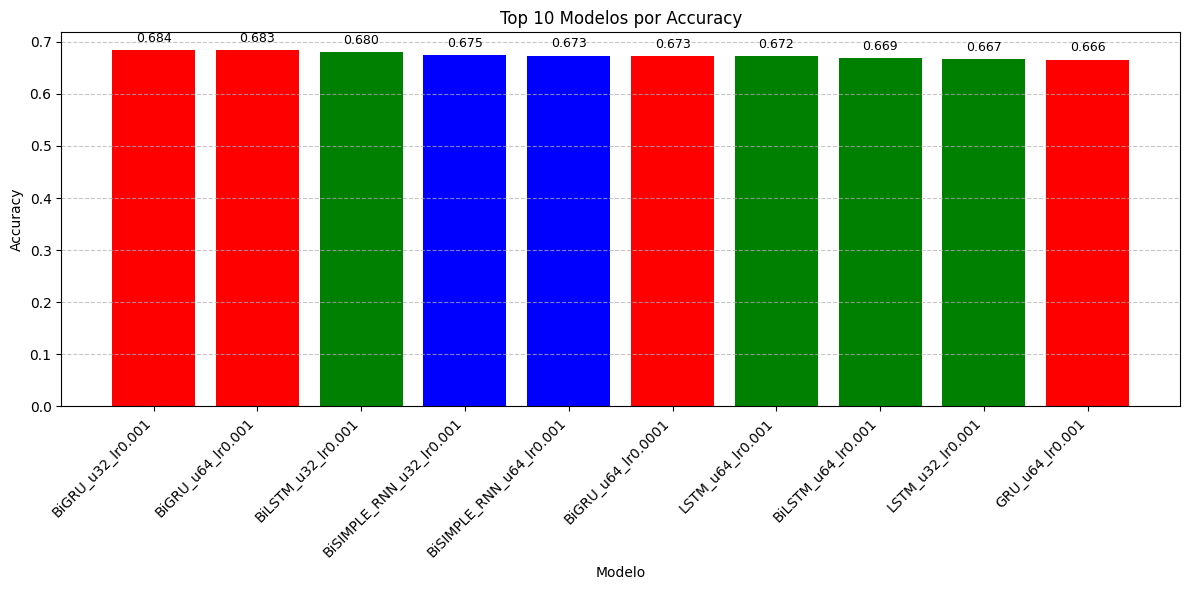

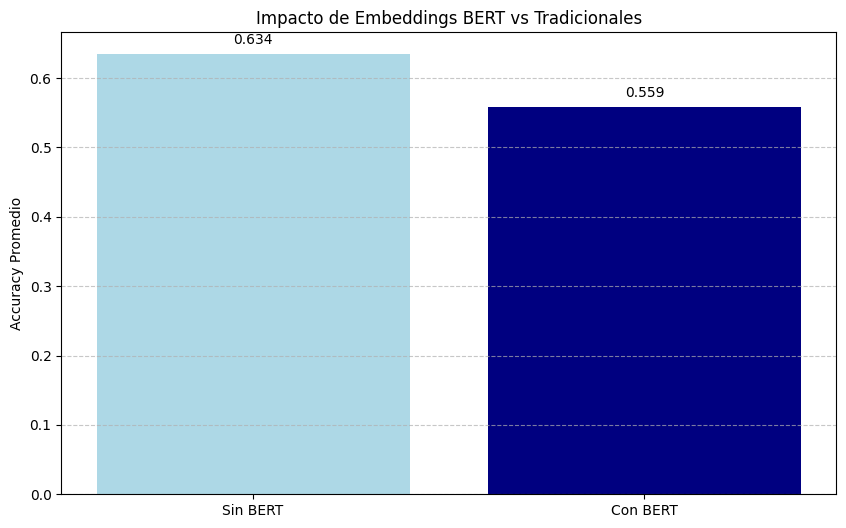

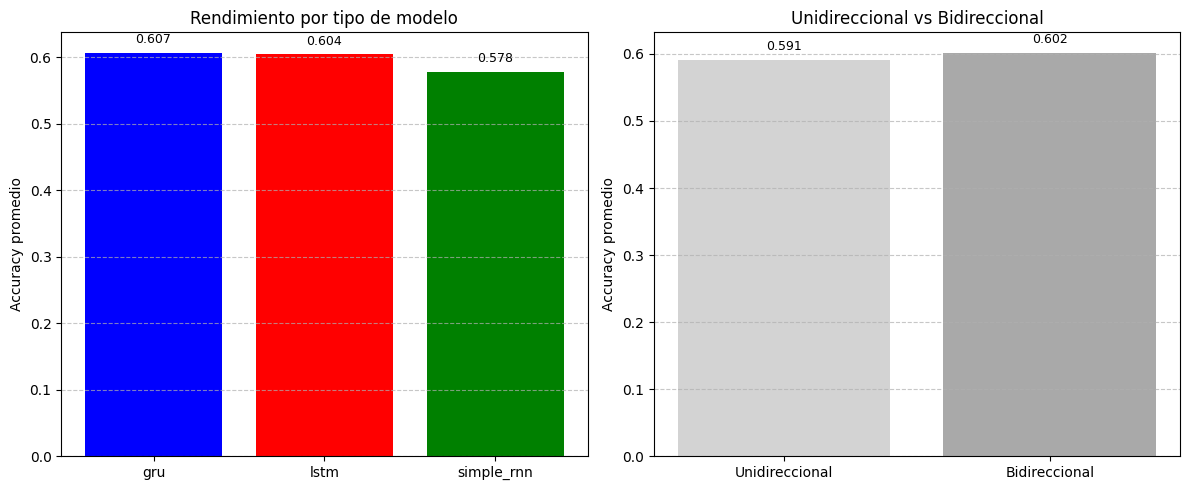


Mejor modelo: BiGRU_u32_lr0.001
Accuracy: 0.6840
F1-Score: 0.6834

Entrenando el mejor modelo con la configuraci√≥n √≥ptima...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.4637 - loss: 1.0414 - val_accuracy: 0.6595 - val_loss: 0.7711
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 13ms/step - accuracy: 0.7251 - loss: 0.6601 - val_accuracy: 0.6800 - val_loss: 0.8118
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.8818 - loss: 0.3414 - val_accuracy: 0.6730 - val_loss: 0.9803
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.9456 - loss: 0.1627 - val_accuracy: 0.6605 - val_loss: 1.2131
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.9695 - loss: 0.0975 - val_accuracy: 0.6575 - val_loss: 1.4128
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step


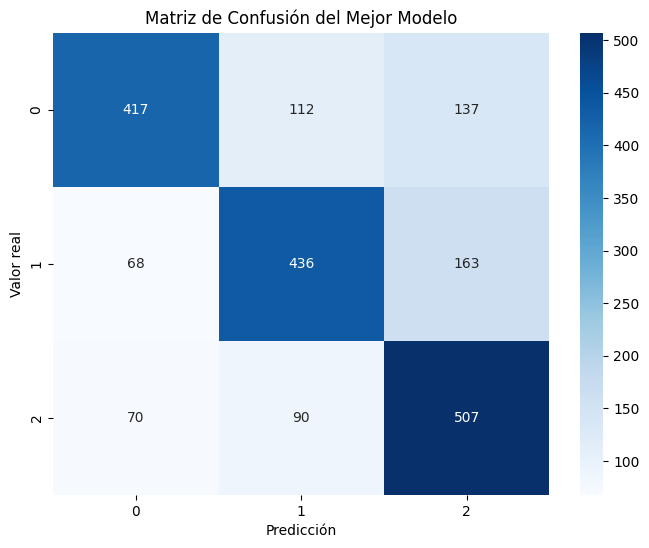


Reporte de clasificaci√≥n del mejor modelo:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       666
           1       0.68      0.65      0.67       667
           2       0.63      0.76      0.69       667

    accuracy                           0.68      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.69      0.68      0.68      2000


Mejor modelo guardado como 'best_financial_sentiment_model_gru.keras'


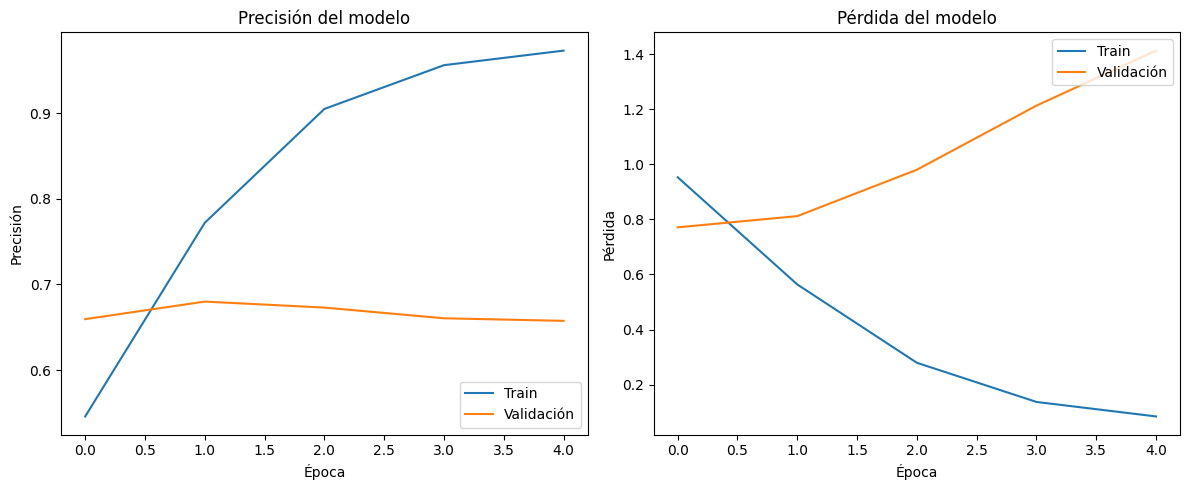


Proceso de grid search y entrenamiento completo.


In [7]:
# VISUALIZACIONES: Comparar rendimiento entre diferentes modelos


# 1. Gr√°fico de barras para los mejores modelos
plt.figure(figsize=(12, 6))
top_n = min(10, len(all_results_sorted))
top_models = results_df.head(top_n)['model_name'].tolist()
top_accs = results_df.head(top_n)['accuracy'].tolist()

# Colores basados en tipo de modelo
colors = []
for model_type in results_df.head(top_n)['model_type']:
    if model_type == 'simple_rnn':
        colors.append('blue')
    elif model_type == 'lstm':
        colors.append('green')
    else:  # gru
        colors.append('red')

# Gr√°fico
bars = plt.bar(top_models, top_accs, color=colors)
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Top 10 Modelos por Accuracy')
plt.xticks(rotation=45, ha='right')

# A√±adir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Comparar modelos con y sin BERT
plt.figure(figsize=(10, 6))
bert_avg = results_df[results_df['use_bert']]['accuracy'].mean()
no_bert_avg = results_df[~results_df['use_bert']]['accuracy'].mean()

bars = plt.bar(['Sin BERT', 'Con BERT'], [no_bert_avg, bert_avg], color=['lightblue', 'navy'])
plt.ylabel('Accuracy Promedio')
plt.title('Impacto de Embeddings BERT vs Tradicionales')

# A√±adir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Comparaci√≥n por tipo de modelo y bidireccionalidad
plt.figure(figsize=(12, 5))

# Subgr√°fico 1: Comparaci√≥n por tipo de modelo
plt.subplot(1, 2, 1)
model_type_perf = results_df.groupby('model_type')['accuracy'].mean()
bars1 = plt.bar(model_type_perf.index, model_type_perf.values, color=['blue', 'red', 'green'])
plt.title('Rendimiento por tipo de modelo')
plt.ylabel('Accuracy promedio')

# A√±adir valores sobre las barras
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subgr√°fico 2: Comparaci√≥n bidireccional vs unidireccional
plt.subplot(1, 2, 2)
bidir_perf = results_df.groupby('bidirectional')['accuracy'].mean()
bars2 = plt.bar(['Unidireccional', 'Bidireccional'], bidir_perf.values, color=['lightgray', 'darkgray'])
plt.title('Unidireccional vs Bidireccional')
plt.ylabel('Accuracy promedio')

# A√±adir valores sobre las barras
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Entrenar el mejor modelo con configuraci√≥n √≥ptima
best_result = all_results_sorted[0]
print(f"\nMejor modelo: {best_result['model_name']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"F1-Score: {best_result['f1_score']:.4f}")

# Crear y entrenar el mejor modelo
print("\nEntrenando el mejor modelo con la configuraci√≥n √≥ptima...")
best_model = create_rnn_model(
    model_type=best_result['model_type'],
    bidirectional=best_result['bidirectional'],
    units=best_result['units'],
    learning_rate=best_result['learning_rate'],
    dropout_rate=0.3,
    use_bert=best_result['use_bert']
)

# Early stopping con un poco m√°s de paciencia para el modelo final
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Entrenar modelo final
history = best_model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,  # M√°s √©pocas para el modelo final
    batch_size=best_result['batch_size'],
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar modelo final
y_pred_probs = best_model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df['label'].unique()),
            yticklabels=sorted(df['label'].unique()))
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor real')
plt.title('Matriz de Confusi√≥n del Mejor Modelo')
plt.show()

# Reporte de clasificaci√≥n
print("\nReporte de clasificaci√≥n del mejor modelo:")
print(classification_report(y_test, y_pred))

# Guardar el mejor modelo
model_filename = f'best_financial_sentiment_model_{best_result["model_type"]}.keras'
best_model.save(model_filename)
print(f"\nMejor modelo guardado como '{model_filename}'")

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisi√≥n del modelo')
plt.ylabel('Precisi√≥n')
plt.xlabel('√âpoca')
plt.legend(['Train', 'Validaci√≥n'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('P√©rdida del modelo')
plt.ylabel('P√©rdida')
plt.xlabel('√âpoca')
plt.legend(['Train', 'Validaci√≥n'], loc='upper right')

plt.tight_layout()
plt.show()

print("\nProceso de grid search y entrenamiento completo.")